Integrowanie z chmurą google

In [2]:
from google.colab import drive

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Import bibliotek

In [4]:
# biblioteki do przygotowania danych
import numpy as np
import pandas as pd

# biblioteki do eksploracji danych
import matplotlib.pyplot as plt

# biblioteki do modelowania
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

Wczytanie danych do analizy

In [5]:
flights = pd.read_csv('/content/drive/MyDrive/Projekt_SDA_DS/flights.csv')

<ipython-input-5-2ea930df18bb>:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('/content/drive/MyDrive/Projekt_SDA_DS/flights.csv')


Przygotowanie danych

In [6]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 31 columns):
 #   Column               Dtype  
---  ------               -----  
 0   YEAR                 int64  
 1   MONTH                int64  
 2   DAY                  int64  
 3   DAY_OF_WEEK          int64  
 4   AIRLINE              object 
 5   FLIGHT_NUMBER        int64  
 6   TAIL_NUMBER          object 
 7   ORIGIN_AIRPORT       object 
 8   DESTINATION_AIRPORT  object 
 9   SCHEDULED_DEPARTURE  int64  
 10  DEPARTURE_TIME       float64
 11  DEPARTURE_DELAY      float64
 12  TAXI_OUT             float64
 13  WHEELS_OFF           float64
 14  SCHEDULED_TIME       float64
 15  ELAPSED_TIME         float64
 16  AIR_TIME             float64
 17  DISTANCE             int64  
 18  WHEELS_ON            float64
 19  TAXI_IN              float64
 20  SCHEDULED_ARRIVAL    int64  
 21  ARRIVAL_TIME         float64
 22  ARRIVAL_DELAY        float64
 23  DIVERTED             int64  
 24

In [21]:
# wybór danych, poprzez usunięcie kolum nie branych pod uwagę

In [74]:
flights2=flights.drop(['YEAR', 'DAY','DIVERTED','CANCELLED', 'SCHEDULED_ARRIVAL','DESTINATION_AIRPORT','SCHEDULED_DEPARTURE','FLIGHT_NUMBER','AIRLINE','DISTANCE','TAIL_NUMBER','TAXI_OUT','SCHEDULED_TIME','DEPARTURE_TIME',
            'WHEELS_OFF','ELAPSED_TIME','AIR_TIME','WHEELS_ON','DAY_OF_WEEK','TAXI_IN','ARRIVAL_TIME',
            'ORIGIN_AIRPORT','CANCELLATION_REASON'],axis=1)

In [35]:
flights2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5819079 entries, 0 to 5819078
Data columns (total 7 columns):
 #   Column               Dtype  
---  ------               -----  
 0   DEPARTURE_DELAY      float64
 1   ARRIVAL_DELAY        float64
 2   AIR_SYSTEM_DELAY     float64
 3   SECURITY_DELAY       float64
 4   AIRLINE_DELAY        float64
 5   LATE_AIRCRAFT_DELAY  float64
 6   WEATHER_DELAY        float64
dtypes: float64(7)
memory usage: 310.8 MB


In [39]:
# praca nad brakującymi danymi

In [43]:
flights2.isna().sum()

DEPARTURE_DELAY          86153
ARRIVAL_DELAY           105071
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [44]:
flights2.sum()

DEPARTURE_DELAY        53718424.0
ARRIVAL_DELAY          25181961.0
AIR_SYSTEM_DELAY       14335762.0
SECURITY_DELAY            80985.0
AIRLINE_DELAY          20172956.0
LATE_AIRCRAFT_DELAY    24961931.0
WEATHER_DELAY           3100233.0
dtype: float64

In [ ]:
## zastepowanie brakujących danych

In [115]:
# usunięcie danych
flights2_cleaned = flights2.dropna()

In [47]:
flights2_cleaned.sum()

DEPARTURE_DELAY        58433753.0
ARRIVAL_DELAY          62651867.0
AIR_SYSTEM_DELAY       14335762.0
SECURITY_DELAY            80985.0
AIRLINE_DELAY          20172956.0
LATE_AIRCRAFT_DELAY    24961931.0
WEATHER_DELAY           3100233.0
dtype: float64

In [48]:
# from sklearn.impute import KNNImputer

# imputer = KNNImputer(n_neighbors=2)
# flights2_imputed = imputer.fit_transform(flights2)

Eksporacyjna analiza danych

In [ ]:
# wizualizacja  korelacji miedzy danymi

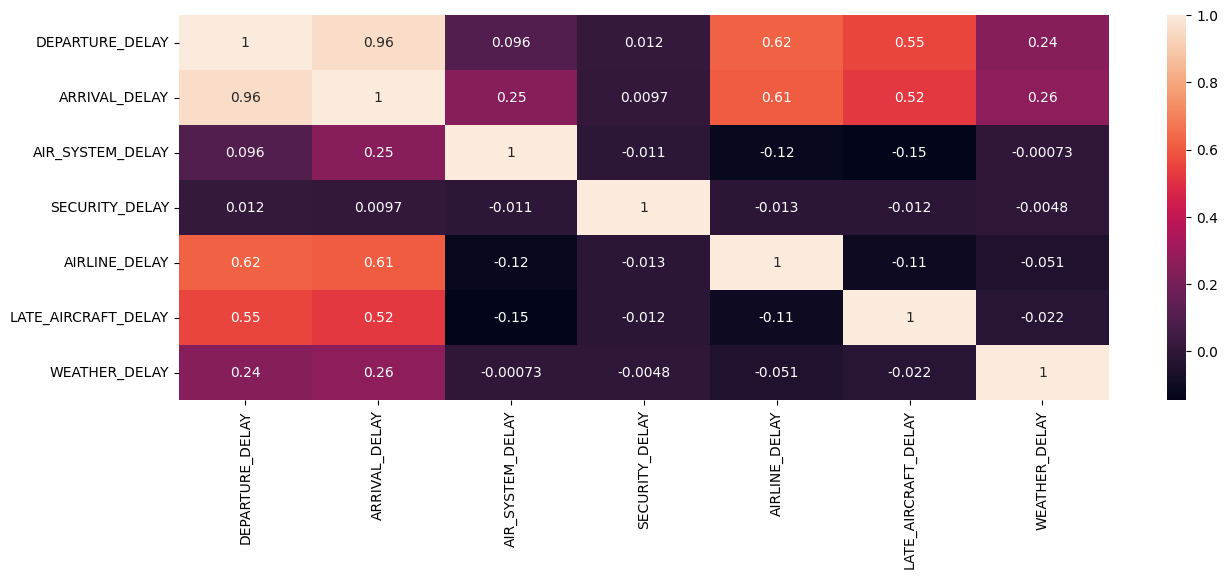

In [57]:
axis = plt.subplots(figsize=(15,5))
sns.heatmap(flights2_cleaned.corr(),annot = True)
plt.show()

In [59]:
# Przedstawienie zależności między dwiema zmiennymi, np. DEPARTURE_DELAY a ARRIVAL_DELAY

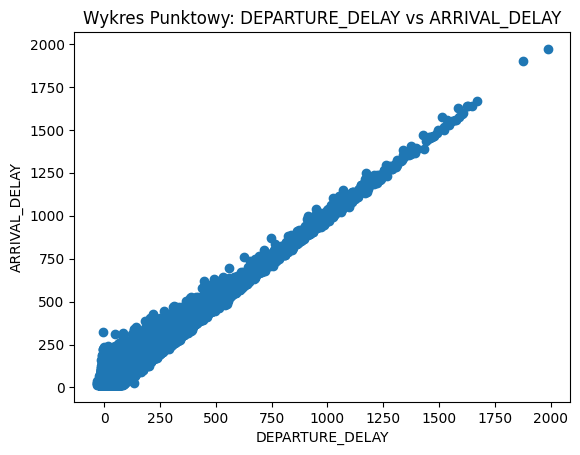

In [61]:
plt.scatter(flights2_cleaned['DEPARTURE_DELAY'], flights2_cleaned['ARRIVAL_DELAY'])
plt.xlabel('DEPARTURE_DELAY')
plt.ylabel('ARRIVAL_DELAY')
plt.title('Wykres Punktowy: DEPARTURE_DELAY vs ARRIVAL_DELAY')
plt.show()

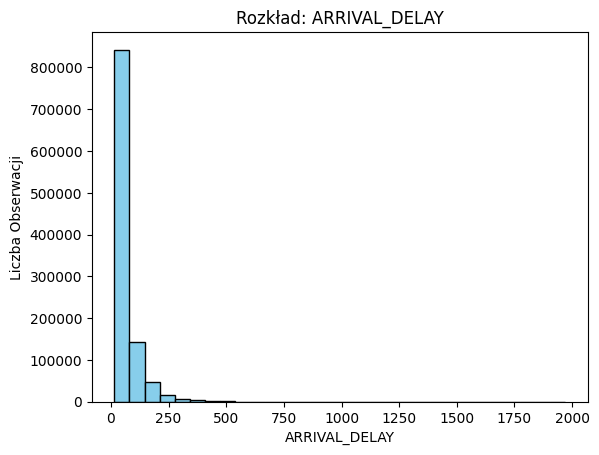

In [72]:
plt.hist(flights2_cleaned['ARRIVAL_DELAY'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('ARRIVAL_DELAY')
plt.ylabel('Liczba Obserwacji')
plt.title('Rozkład: ARRIVAL_DELAY')
plt.show()

In [ ]:
# box plot

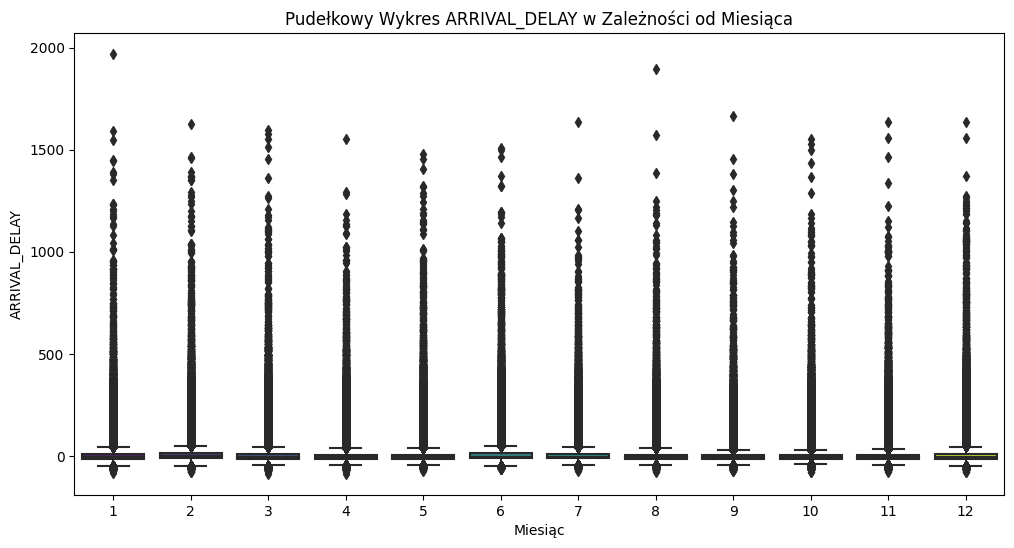

In [76]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MONTH', y='ARRIVAL_DELAY', data=flights2, palette='viridis')

plt.xlabel('Miesiąc')
plt.ylabel('ARRIVAL_DELAY')
plt.title('Pudełkowy Wykres ARRIVAL_DELAY w Zależności od Miesiąca')

plt.show()

In [123]:
# box plot bez wartości odstających

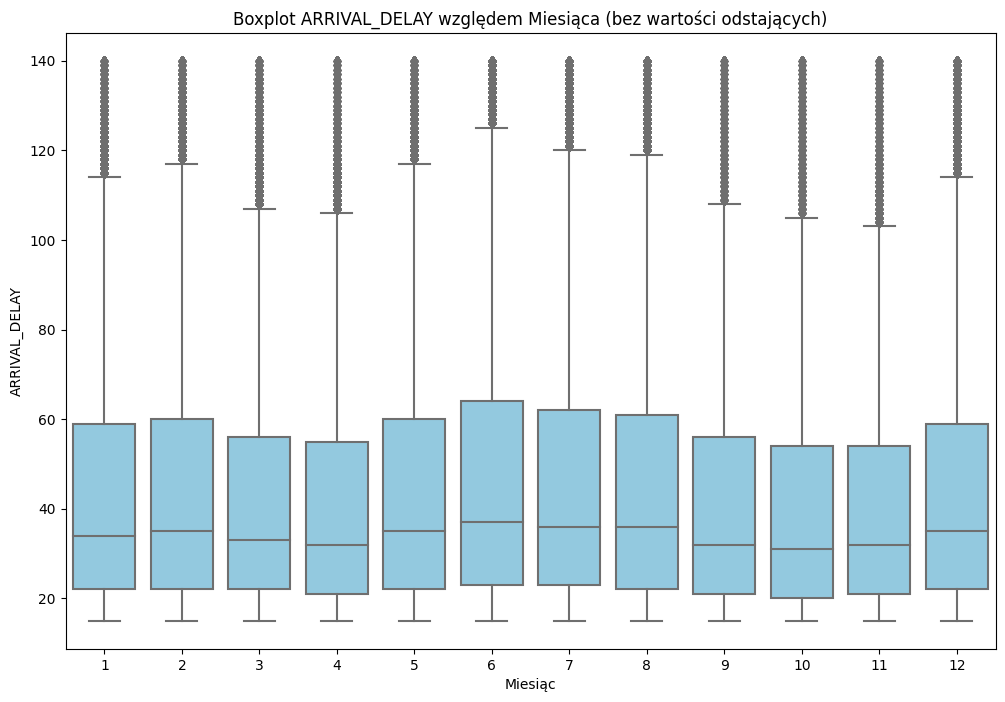

In [122]:
Q1 = flights2_cleaned['ARRIVAL_DELAY'].quantile(0.25)
Q3 = flights2_cleaned['ARRIVAL_DELAY'].quantile(0.75)
IQR = Q3 - Q1

outliers_mask = ((flights2_cleaned['ARRIVAL_DELAY'] < (Q1 - 1.5 * IQR)) | (flights2_cleaned['ARRIVAL_DELAY'] > (Q3 + 1.5 * IQR)))
flights2_no_outliers = flights2_cleaned[~outliers_mask]

plt.figure(figsize=(12, 8))
sns.boxplot(x=flights2_no_outliers['MONTH'], y=flights2_no_outliers['ARRIVAL_DELAY'], color='skyblue')
plt.xlabel('Miesiąc')
plt.ylabel('ARRIVAL_DELAY')
plt.title('Boxplot ARRIVAL_DELAY względem Miesiąca (bez wartości odstających)')
plt.show()

przygotowanie danych do modelowania



In [127]:
# Podział danych
X = flights2_cleaned.drop('ARRIVAL_DELAY', axis=1)
y = flights2_cleaned['ARRIVAL_DELAY']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

1. Model bazowy


In [100]:
# średnia wartość docelowwa ze zbioru treningowego
mean_value = np.mean(y_train)


In [101]:
# Przewidywanie na danych testowych za pomocą modelu średniej
y_pred_mean = np.full_like(y_test, fill_value=mean_value)

In [102]:
# Ocena modelu średniej
mse_mean = mean_squared_error(y_test, y_pred_mean)
print(f'Mean Squared Error (Model Średniej): {mse_mean}')

Mean Squared Error (Model Średniej): 4104.566004407825


2. Regresja liniowa

In [83]:
# Inicjalizacja i trenowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [84]:
# Przewidywanie na danych testowych
y_pred = model.predict(X_test)

In [85]:
# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 9.53204203248612e-27


3. Drzewo decyzyjne

In [90]:
# Inicjalizacja i trenowanie modelu drzewa decyzyjnego
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [91]:
# Przewidywanie na danych testowych
y_pred = model.predict(X_test)

In [92]:
# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

MSE: 6.706156435718047


3. Random Forest

In [96]:
# Inicjalizacja i trenowanie modelu Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [98]:
# Przewidywanie na danych testowych
y_pred = model.predict(X_test)

In [99]:
# Ocena modelu
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 4.18543411711051
